##  Day 13 Multi-Processing vs Threading
### Processing methods
#### Ex1. Regular Processing
* Process tasks one by one, regardless wether the tasks are related.

In [4]:
from random import randint
from time import time, sleep


def download_task(filename):
    print('Lets begin to download %s...' % filename)
    time_to_download = randint(5, 10)
    sleep(time_to_download)
    print('%s Download Complete! used %d second' % (filename, time_to_download))


def download_time():
    start = time()
    download_task('Street Dance of China EP4.mp4')
    download_task('Yibo_wang 一波王炸.gif')
    end = time()
    print('total downloading time %.2f second.' % (end - start))

download_time()

Lets begin to download Street Dance of China EP4.mp4...
Street Dance of China EP4.mp4 Download Complete! used 5 sec
Lets begin to download Yibo_wang 一波王炸.gif...
Yibo_wang 一波王炸.gif Download Complete! used 9 sec
total downloading time 14.00 second.


#### Ex2. Mutli-Processing
* Process different tasks simultaneously

In [6]:
from multiprocessing import Process
from os import getpid
from random import randint
from time import time, sleep


def download_task(filename):
    print('Lets begin to download %s...' % filename)
    time_to_download = randint(5, 10)
    sleep(time_to_download)
    print('%s Download Complete! used %d second' % (filename, time_to_download))



def multi_download_time():
    start = time()
    p1 = Process(target=download_task, args=('Street Dance of China EP4.mp4', ))
    p1.start()
    p2 = Process(target=download_task, args=('Yibo_wang 一波王炸.gif', ))
    p2.start()
    p1.join()
    p2.join()
    end = time()
    print('total downloading time %.2f second.' % (end - start))

multi_download_time()

total downloading time 0.34 second.


### Thread Method

#### Ex3. Thread module download

In [8]:
from random import randint
from threading import Thread
from time import time, sleep


def download_task(filename):
    print('Lets begin to download %s...' % filename)
    time_to_download = randint(5, 10)
    sleep(time_to_download)
    print('%s Download Complete! used %d second' % (filename, time_to_download))

def thread_time():
    start = time()
    t1 = Thread(target=download_task, args=('Street Dance of China EP4.mp4', ))
    t1.start()
    t2 = Thread(target=download_task, args=('Yibo_wang 一波王炸.gif', ))
    t2.start()
    t1.join()
    t2.join()
    end = time()
    print('total downloading time %.2f second.' % (end - start))
    
thread_time()

Lets begin to download Street Dance of China EP4.mp4...
Lets begin to download Yibo_wang 一波王炸.gif...
Street Dance of China EP4.mp4 Download Complete! used 6 second
Yibo_wang 一波王炸.gif Download Complete! used 8 secondtotal downloading time 8.02 second.



#### Ex4. Threading with iheritance

In [17]:
from random import randint
from threading import Thread
from time import time, sleep


class DownloadTask(Thread):

    def __init__(self, filename):
        super().__init__()
        self._filename = filename

    def run(self):
        print('Lets begin to download %s...' % self._filename)
        time_to_download = randint(5, 10)
        sleep(time_to_download)
        print('%s Download Complete! used %d second' % (self._filename, time_to_download))


def m_time():
    start = time()
    t1 = DownloadTask('Street Dance of China EP4.mp4')
    t1.start()
    t2 = DownloadTask('Yibo_wang 一波王炸.gif')
    t2.start()
    t1.join()
    t2.join()
    end = time()
    print('total downloading time %.2f second.' % (end - start))

m_time()

Lets begin to download Street Dance of China EP4.mp4...
Lets begin to download Yibo_wang 一波王炸.gif...
Yibo_wang 一波王炸.gif Download Complete! used 5 second
Street Dance of China EP4.mp4 Download Complete! used 6 secondtotal downloading time 6.01 second.



#### Ex5. 📞 Multiple Fans Vote for  One Idol 📞
* Lock feature
Producer Camp fans are voting for their idols for him/her to make a stage debut. In order to add the correct number of votes, we need to use *Lock* 
$$ total.call= self.call +vote $$

In [47]:
from time import sleep
from threading import Thread, Lock

class Idolaccount(object):
    
    def __init__(self):
        self._call=0
        self._lock=Lock()
        
    def addoil(self, vote):
        self._lock.acquire()
        try:
            total_call= self._call+ vote
            sleep(0.01)
            self._call= total_call
        finally:
            self._lock.release()
    
    @property
    def call(self):
        return self._call
    
class Debut(Thread):
    def __init__(self, Idolaccount, vote):
        super().__init__()
        self._Idolaccount=Idolaccount
        self._vote=vote
        
    def run(self):
        self._Idolaccount.addoil(self._vote)
        

    

In [50]:
def idol(name):
    idolaccount= Idolaccount()
    threads=[]
    for _ in range(100):
        t=Debut(idolaccount, 1)
        threads.append(t)
        t.start()
        
    for t in threads:
        t.join()
    print('%s has %d vote. Lets walk the flower path！\n一起走花路吧 ❀' %(name, idolaccount.call), end="\n")
    


In [51]:
idol("陈卓璇")

陈卓璇 has 100 vote. Lets walk the flower path！
一起走花路吧 ❀


#### Ex6. Thread for Independent Download 
* config: NORMAL, DISABLED

In [52]:
import time
import tkinter
import tkinter.messagebox
from threading import Thread

def downld():
    class DownloadTaskHandler(Thread):
        def run(self):
            time.sleep(10)
            tkinter.messagebox.showinfo("Hola", "Download Completed! ❀" )
            button1.config(state=tkinter.NORMAL)
            
    def download():
        button1.config(state=tkinter.DISABLED)
        DownloadTaskHandler(daemon=True).start()
        
    def show_about():
        tkinter.messagebox.showinfo("About", "Dancer : Yibo (v1.0)")
        
    top=tkinter.Tk()
    top.title("Single Thread")
    top.geometry("200x150")
    top.wm_attributes("-topmost", 1)
    
    panel=tkinter.Frame(top)
    button1 = tkinter.Button(panel, text='download', command=download)
    button1.pack(side='left')
    button2 = tkinter.Button(panel, text='about', command=show_about)
    button2.pack(side='right')
    panel.pack(side='bottom')

    tkinter.mainloop()

In [53]:
downld()

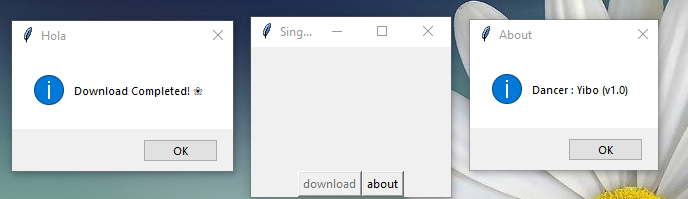

In [54]:
from IPython.display import Image
from IPython.display import HTML, display

p1=Image(filename="/Users/fatan/Desktop/ALL/1Study/6.Wordpress/sas/downld.png" ,width="500", height="275" )
display(p1)

#### Ex7. Time to calculate the sum from 1 to 100000000

In [4]:
def main():
    total = 0
    number_list = [x for x in range(1, 100000001)]
    start = time()
    for number in number_list:
        total += number
    print(total)
    end = time()
    print('Execution time: %.3fs' % (end - start))


if __name__ == '__main__':
    main()

5000000050000000
Execution time: 8.995s
